In [1]:
%autosave 180
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Autosaving every 180 seconds


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from tqdm.notebook import tqdm
from scipy.ndimage import gaussian_filter as gauss
import plotly.graph_objects as go
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model

In [4]:
import sys
sys.path.append('../')
import src.misc as mc
from src.NeuralEikonalSolver import NES_TP
import src.baseLayers as bl
from src.eikonalLayers import IsoEikonal
from eikonalfm import factored_fast_marching as ffm
from eikonalfm import distance

# Grid definition

In [5]:
# General receiver points

nx, nz = 51, 51

xmin, xmax = -1.0, 1.0
zmin, zmax = -1.0, 1.0
x = np.linspace(xmin, xmax, nx)
z = np.linspace(zmin, zmax, nz)

Xr = np.stack(np.meshgrid(x, z, indexing='ij'), axis=-1)
Xr_train = np.stack(np.meshgrid(x[::2], z[::2], indexing='ij'), axis=-1)

# General source points

s_sp = 4
Xs = np.stack(np.meshgrid(x, z, indexing='ij'), axis=-1)
Xs_train = np.stack(np.meshgrid(x[::s_sp], z[::s_sp], indexing='ij'), axis=-1)

In [6]:
# Test set

ns = Xs[..., 0].size
nr = Xr[..., 0].size

XS = np.repeat(Xs.reshape(-1, 1, Xs.shape[-1]), nr, axis=1)
XR = np.repeat(Xr.reshape(1, -1, Xr.shape[-1]), ns, axis=0)

# Train set

_ns = Xs_train[..., 0].size
_nr = Xr_train[..., 0].size

XS_train = np.repeat(Xs_train.reshape(-1, 1, Xs_train.shape[-1]), _nr, axis=1)
XR_train = np.repeat(Xr_train.reshape(1, -1, Xr_train.shape[-1]), _ns, axis=0)

In [9]:
# Velocity model

# izh = 35
# zh = z[izh]
# vmin, vmax = 1.0, 2.0
# Vel = hp.TwoLayered(zh, vmin, vmax)
# Vel = mc.VerticalGradient(4.0, 3.0)
# V = Vel(Xr)
# V = gauss(V, 5)

vmin, vmax = 1.0, 2.0
V = (np.cos(Xr * 2.5 * np.pi).prod(axis=-1) + 1) / 2 * (vmax - vmin) + vmin
 
Vel = mc.Interpolator(V, x, z)

In [10]:
# 2-order Factored FMM

T = np.empty((ns, nr))
dxs = [x[1]-x[0], z[1]-z[0]]
with tqdm(total=ns) as p_bar:
    for i in range(0, nx, 1):
        for j in range(0, nz, 1):
            # k = i // 2 * len(range(0, nz, 2)) + j // 2
            k = i * nz + j
            T[k] = ffm(V, (i,j), dxs, 2).ravel()
            T[k] *= distance(V.shape, dxs, (i,j), indexing='ij').ravel()
            p_bar.update()

:Overlay
   .Image.Velocity :Image   [x,y]   (z)
   .Contours.FMM   :Contours   [x,y]   (z)
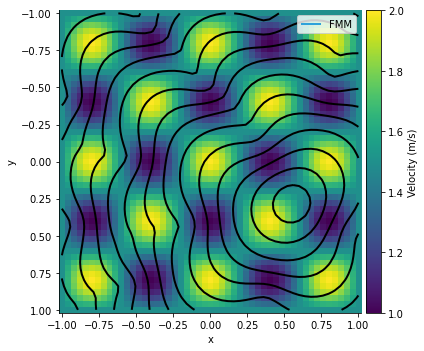

In [13]:
j = np.random.randint(0, len(T))

vmap = hv.Image((x, z, V.T), label='Velocity').opts(cmap='viridis', colorbar=True, clabel='Velocity (m/s)')

# tmap = hv.Image((x, z, T[j].reshape(nx,nz).T), label='T')
# tctr = hv.operation.contours(tmap, levels=15).opts(cmap='kb', show_legend=True, line_dash='solid', line_width=3, color_levels=1)

tmap = hv.Image((x, z, T[j].reshape(nx,nz).T), label='FMM')
tctr = hv.operation.contours(tmap, levels=15).opts(cmap='kb', show_legend=True, linestyle='solid', 
                                                   linewidth=2, color_levels=1)

(vmap * tctr).opts(hv.opts.Image(show_legend=False, fig_size=150, invert_yaxis=True))

In [51]:
X = np.concatenate((XS_train.reshape(-1, XS_train.shape[-1]), 
                    XR_train.reshape(-1, XR_train.shape[-1])), axis=-1)
equation = IsoEikonal(P=2, norm=True)
NES = NES_TP(x=X, xscale=xmax, vmin=vmin, vmax=vmax, 
             velocity=Vel, eikonal=equation)

### How to define an activation function?
**Example:** `act = 'ad-tanh-10'`

It must contain 3 parts separated by dash '-':

1.   first part can be either `''` (empty - non-adaptive), `'ad'` or `'lad'` (meaning locally adaptive)
2.   second part is the name of activation function (`'tanh', 'sigmoid', 'relu'`, ...)
3.   third part is the adaptive degree `n` (e.g. `tanh(n * x)`)


In [70]:
NES.build_model(nl=4, nu=50, 
                act='ad-gauss-1', # hidden activation
                out_act='ad-sigmoid-1', # output activation
                symmetric=True, # T(xs, xr) = T(xr, xs)
                factored=True, # factorization - T = T0 * S, where T0 homogeneous solution
                out_vscale=True, # improved factorization T = T0 * S, where S in [1/vmax, 1/vmin] 
                losses=['Er'], # meaning solution w.r.t. 'xr'
                )

In [72]:
NES.train_inputs()
NES.train_outputs()
NES.compile(lr=1e-2, loss='mae')

In [73]:
%%time
h = NES.train(batch_size=15000, epochs=250, verbose=1)

Epoch 1/250
8/8 [==============================] - 8s 248ms/step - loss: 0.1559
Epoch 2/250
8/8 [==============================] - 2s 246ms/step - loss: 0.1226
Epoch 3/250
8/8 [==============================] - 2s 250ms/step - loss: 0.1191
Epoch 4/250
8/8 [==============================] - 2s 249ms/step - loss: 0.1184
Epoch 5/250
8/8 [==============================] - 2s 248ms/step - loss: 0.1184
Epoch 6/250
8/8 [==============================] - 2s 252ms/step - loss: 0.1189
Epoch 7/250
8/8 [==============================] - 2s 264ms/step - loss: 0.1187
Epoch 8/250
8/8 [==============================] - 2s 257ms/step - loss: 0.1179
Epoch 9/250
8/8 [==============================] - 2s 267ms/step - loss: 0.1178
Epoch 10/250
8/8 [==============================] - 2s 266ms/step - loss: 0.1174
Epoch 11/250
8/8 [==============================] - 2s 254ms/step - loss: 0.1167
Epoch 12/250
8/8 [==============================] - 2s 248ms/step - loss: 0.1167
Epoch 13/250
8/8 [===================

8/8 [==============================] - 2s 271ms/step - loss: 0.0296
Epoch 103/250
8/8 [==============================] - 2s 288ms/step - loss: 0.0297
Epoch 104/250
8/8 [==============================] - 2s 274ms/step - loss: 0.0289
Epoch 105/250
8/8 [==============================] - 2s 285ms/step - loss: 0.0299
Epoch 106/250
8/8 [==============================] - 2s 280ms/step - loss: 0.0298
Epoch 107/250
8/8 [==============================] - 2s 281ms/step - loss: 0.0292
Epoch 108/250
8/8 [==============================] - 2s 300ms/step - loss: 0.0293
Epoch 109/250
8/8 [==============================] - 3s 334ms/step - loss: 0.0297
Epoch 110/250
8/8 [==============================] - 3s 322ms/step - loss: 0.0300
Epoch 111/250
8/8 [==============================] - 2s 295ms/step - loss: 0.0288
Epoch 112/250
8/8 [==============================] - 2s 286ms/step - loss: 0.0292
Epoch 113/250
8/8 [==============================] - 3s 335ms/step - loss: 0.0297
Epoch 114/250
8/8 [===========

8/8 [==============================] - 2s 251ms/step - loss: 0.0246
Epoch 202/250
8/8 [==============================] - 2s 245ms/step - loss: 0.0240
Epoch 203/250
8/8 [==============================] - 2s 246ms/step - loss: 0.0240
Epoch 204/250
8/8 [==============================] - 2s 244ms/step - loss: 0.0232
Epoch 205/250
8/8 [==============================] - 2s 245ms/step - loss: 0.0239
Epoch 206/250
8/8 [==============================] - 2s 248ms/step - loss: 0.0245
Epoch 207/250
8/8 [==============================] - 2s 252ms/step - loss: 0.0242
Epoch 208/250
8/8 [==============================] - 2s 245ms/step - loss: 0.0241
Epoch 209/250
8/8 [==============================] - 2s 247ms/step - loss: 0.0239
Epoch 210/250
8/8 [==============================] - 2s 249ms/step - loss: 0.0243
Epoch 211/250
8/8 [==============================] - 2s 247ms/step - loss: 0.0240
Epoch 212/250
8/8 [==============================] - 2s 248ms/step - loss: 0.0234
Epoch 213/250
8/8 [===========

:Curve   [x]   (y)
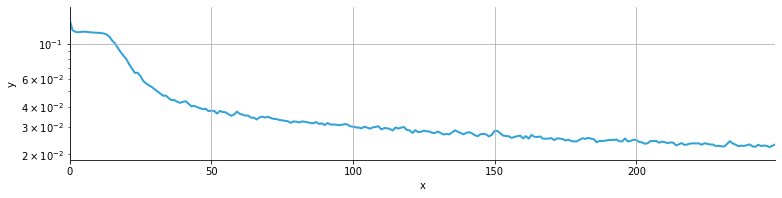

In [74]:
 hv.Curve(h.history['loss']).opts(logy=True, show_grid=True, fig_size=350, aspect=2)

In [75]:
T_pred = NES.Traveltime(np.concatenate((XS, XR), axis=-1).reshape(-1, 4), batch_size=100000, verbose=1)

68/68 [==============================] - 13s 194ms/step


In [76]:
T_pred = T_pred.reshape(ns, nr)

:Overlay
   .Image.Velocity :Image   [x,y]   (z)
   .Contours.FMM   :Contours   [x,y]   (z)
   .Contours.PINN  :Contours   [x,y]   (z)
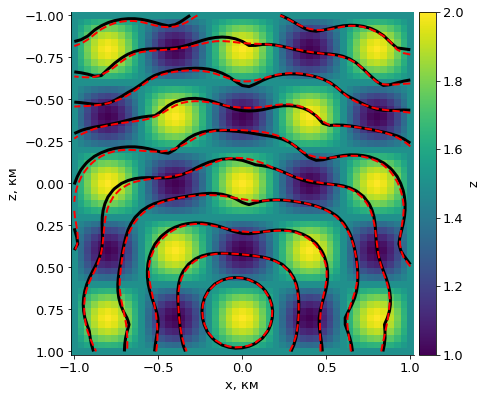

In [81]:
j = np.random.randint(0, len(T))

vmap = hv.Image((x, z, V.T), label='Velocity').opts(cmap='viridis', colorbar=True)

levels = np.linspace(0, T[j].max(), 12)

tmap = hv.Image((x, z, T[j].reshape(nx,nz).T), label='FMM')
tctr = hv.operation.contours(tmap, levels=levels).opts(cmap='kb', show_legend=True, linewidth=3, color_levels=1)

tnnmap = hv.Image((x, z, T_pred[j].reshape(nx,nz).T), label='PINN')
tnnctr = hv.operation.contours(tnnmap, levels=levels).opts(cmap='autumn', show_legend=True, 
                                                           linestyle='dashed', linewidth=2, color_levels=1)

(vmap * tctr * tnnctr).opts(hv.opts.Image(fig_size=170, 
                                          show_legend=False, 
                                          invert_yaxis=True)).opts(show_legend=False, xlabel='x, км', ylabel='z, км', 
                                                                   fontsize=dict(labels=13, ticks=13))

## Lalplacian calculation

In [83]:
H = NES.HessianR(np.concatenate((XS, XR), axis=-1).reshape(-1, 4), batch_size=100000, verbose=1)

68/68 [==============================] - 130s 2s/step


In [84]:
H = H.reshape(ns, nr, 3)

:Overlay
   .Image.Velocity :Image   [x,y]   (z)
   .Contours.FMM   :Contours   [x,y]   (z)
   .Contours.PINN  :Contours   [x,y]   (z)
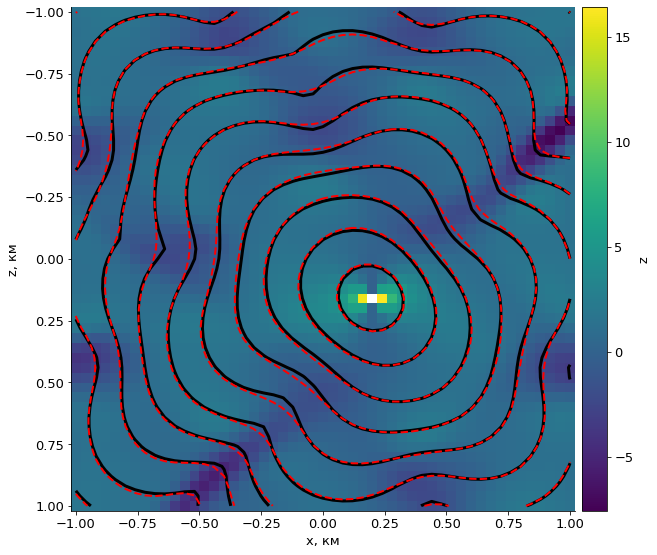

In [85]:
j = np.random.randint(0, len(T))

vmap = hv.Image((x, z, H[j,...,2].reshape(nx,nz).T), label='Velocity').opts(cmap='viridis',colorbar=True)

levels = np.linspace(0, T[j].max(), 12)

tmap = hv.Image((x, z, T[j].reshape(nx,nz).T), label='FMM')
tctr = hv.operation.contours(tmap, levels=levels).opts(cmap='kb', show_legend=True, linewidth=3, color_levels=1)

tnnmap = hv.Image((x, z, T_pred[j].reshape(nx,nz).T), label='PINN')
tnnctr = hv.operation.contours(tnnmap, levels=levels).opts(cmap='autumn', show_legend=True, 
                                                           linestyle='dashed', linewidth=2, color_levels=1)

(vmap * tctr * tnnctr).opts(hv.opts.Image(fig_size=250, 
                                          show_legend=False, 
                                          invert_yaxis=True)).opts(show_legend=False, xlabel='x, км', ylabel='z, км', 
                                                                   fontsize=dict(labels=13, ticks=13))